## k-armed bandit

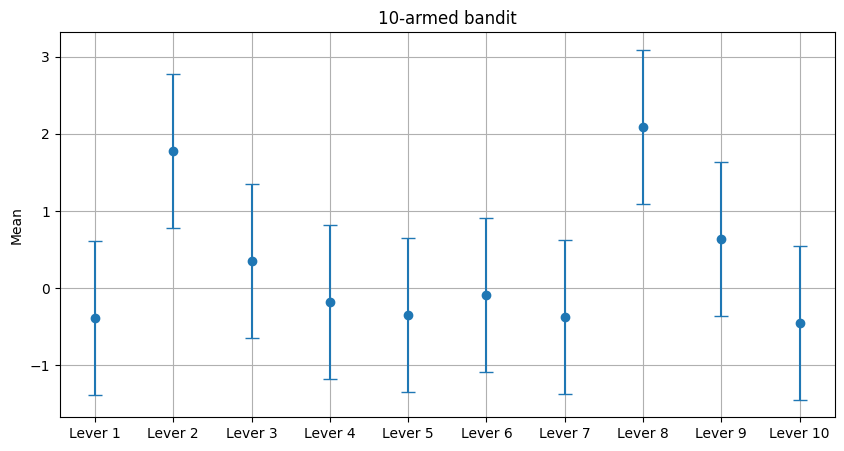

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# k-armed bandit
means = np.random.randn(10)  # Mean values for each group
std_devs = np.ones(10)  # Standard deviations for each group

# Create x-values for the groups
x_values = np.arange(len(means))

# Create a plot with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(x_values, means, yerr=std_devs, fmt='o', capsize=5)
plt.xticks(x_values, ['Lever 1', 'Lever 2', 'Lever 3', 'Lever 4', 'Lever 5', 'Lever 6', 'Lever 7', 'Lever 8', 'Lever 9', 'Lever 10'])
plt.ylabel('Mean')
plt.title('10-armed bandit')
plt.grid(True)
plt.show()


$\epsilon$-greedy action selection

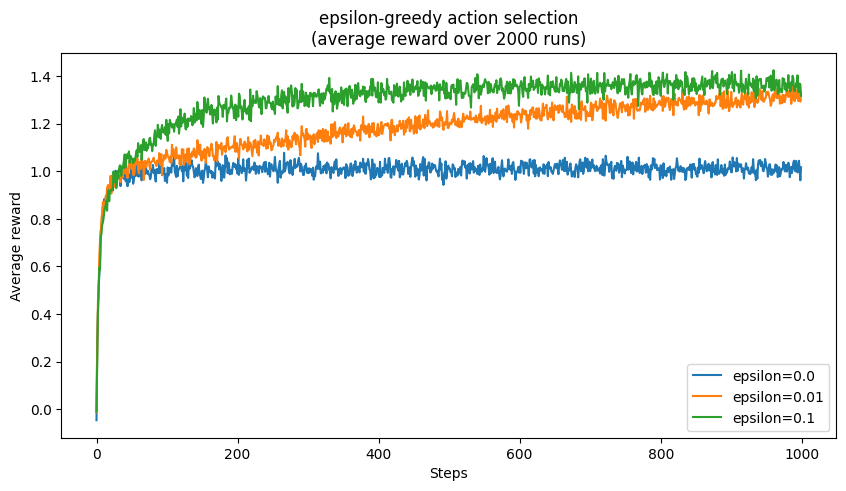

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 5))
for epsilon in [0.0, 0.01, 0.1]:
    Q = np.zeros((2000, 10))
    N = np.zeros((2000, 10))
    histories = []
    for j in range(2000):
        history = []
        for i in range(1000):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    avg_history = np.mean(histories, axis=0)
    plt.plot(avg_history, label='epsilon={}'.format(epsilon))

plt.title('epsilon-greedy action selection\n(average reward over 2000 runs)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()


Optimistic Initial Values

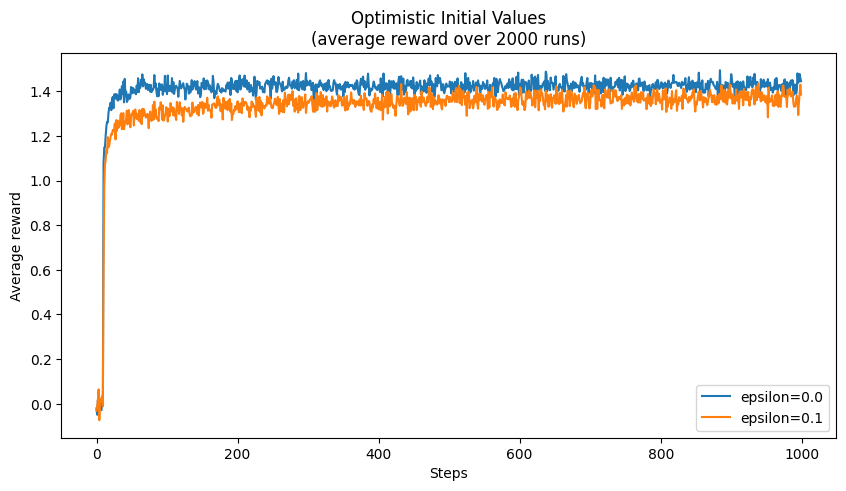

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 5))
for epsilon in [0.0, 0.1]:
    Q = np.zeros((2000, 10))+5
    N = np.zeros((2000, 10))
    histories = []
    for j in range(2000):
        history = []
        for i in range(1000):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    avg_history = np.mean(histories, axis=0)
    plt.plot(avg_history, label='epsilon={}'.format(epsilon))

plt.title('Optimistic Initial Values\n(average reward over 2000 runs)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()


Upper-Confidence-Bound Action Selection

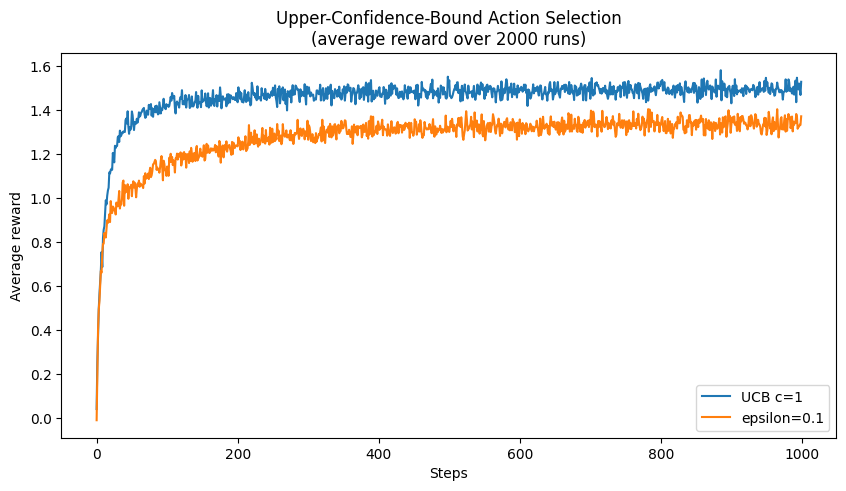

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)

# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 5))

Q = np.zeros((2000, 10))
N = np.ones((2000, 10))
c = 1
histories = []
for j in range(2000):
    history = []
    for i in range(1000):
        action = np.argmax([stima+np.sqrt(np.log(i+1)/N[j][idx]) for idx, stima in enumerate(Q[j])])
        reward = np.random.normal(loc=q[j][action], scale=1)
        N[j][action] += 1
        Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
        history.append(reward)
    histories.append(history)
avg_history = np.mean(histories, axis=0)
plt.plot(avg_history, label='UCB c=1')

Q = np.zeros((2000, 10))
N = np.zeros((2000, 10))
histories = []
for j in range(2000):
    history = []
    for i in range(1000):
        action = next_action(Q[j], epsilon)
        reward = np.random.normal(loc=q[j][action], scale=1)
        N[j][action] += 1
        Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
        history.append(reward)
    histories.append(history)
avg_history = np.mean(histories, axis=0)
plt.plot(avg_history, label='epsilon=0.1')

plt.title('Upper-Confidence-Bound Action Selection\n(average reward over 2000 runs)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()


### Exercise 4

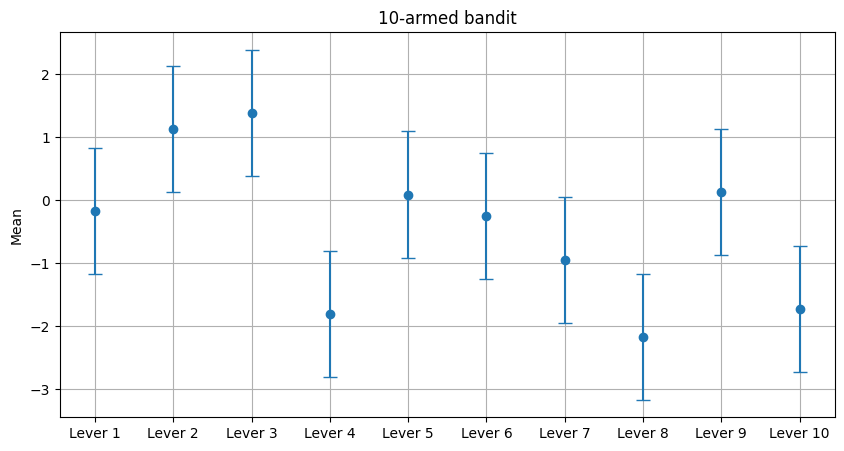

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# k-armed bandit
means = np.random.randn(10)  # Mean values for each group
std_devs = np.ones(10)  # Standard deviations for each group

# Create x-values for the groups
x_values = np.arange(len(means))

# Create a plot with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(x_values, means, yerr=std_devs, fmt='o', capsize=5)
plt.xticks(x_values, ['Lever 1', 'Lever 2', 'Lever 3', 'Lever 4', 'Lever 5', 'Lever 6', 'Lever 7', 'Lever 8', 'Lever 9', 'Lever 10'])
plt.ylabel('Mean')
plt.title('10-armed bandit')
plt.grid(True)
plt.show()


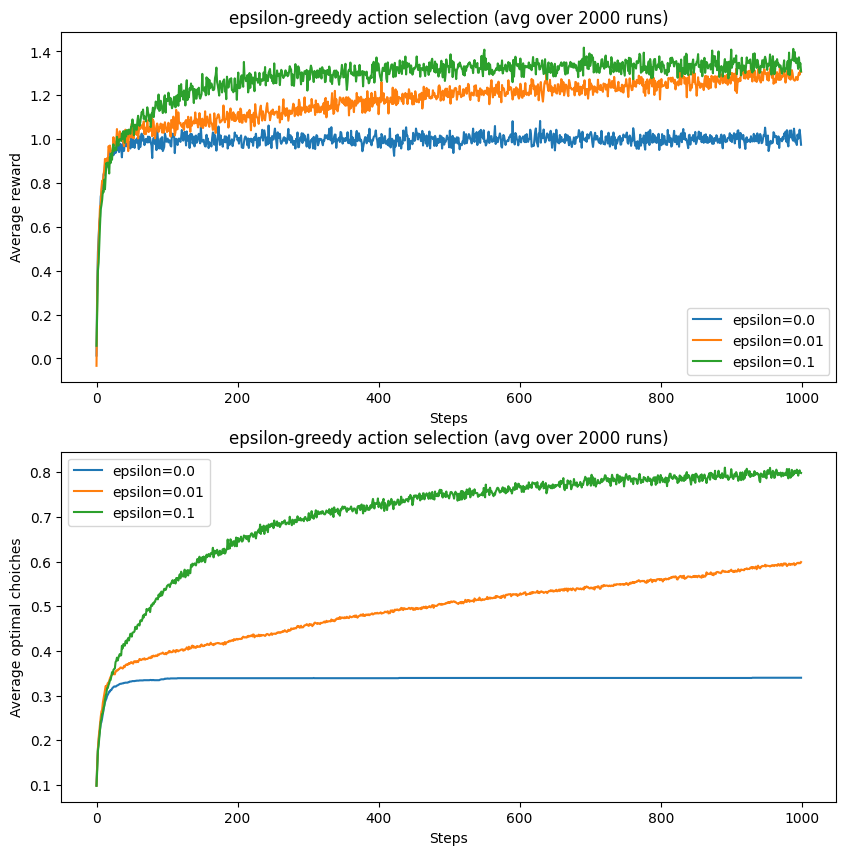

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)
for epsilon in [0.0, 0.01, 0.1]:
    Q = np.zeros((2000, 10))
    N = np.zeros((2000, 10))
    histories = []
    optimal_choiches = []
    for j in range(2000):
        history = []
        optimal_choice = []
        for i in range(1000):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(q[j]))
        histories.append(history)
        optimal_choiches.append(optimal_choice)
    avg_history = np.mean(histories, axis=0)
    avg_optimal_choiches = np.mean(optimal_choiches, axis=0)
    ax1.plot(avg_history, label='epsilon={}'.format(epsilon))
    ax2.plot(avg_optimal_choiches, label='epsilon={}'.format(epsilon))


ax1.set_title('epsilon-greedy action selection (avg over 2000 runs)')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Average reward')
ax1.legend()

ax2.set_title('epsilon-greedy action selection (avg over 2000 runs)')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Average optimal choiches')
ax2.legend()
plt.show()


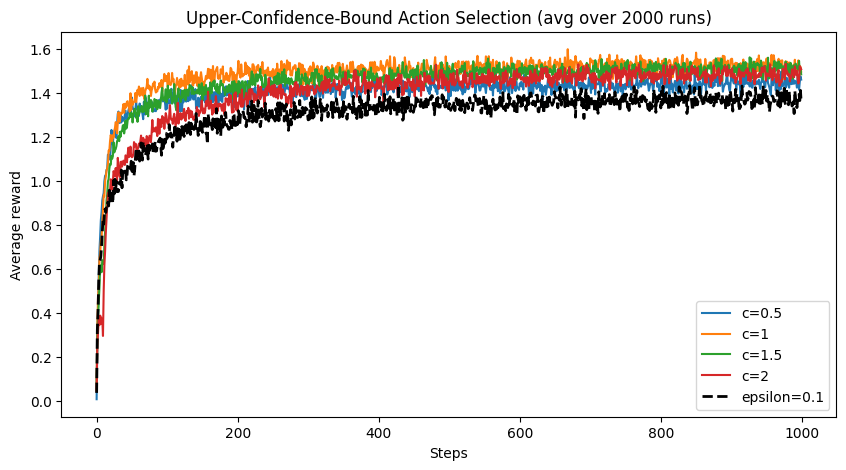

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)

# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 5))

for c in [0.5, 1, 1.5, 2]:
    Q = np.zeros((2000, 10))
    N = np.ones((2000, 10))
    histories = []
    for j in range(2000):
        history = []
        for i in range(1000):
            action = np.argmax([stima+c*np.sqrt(np.log(i+1)/N[j][idx]) for idx, stima in enumerate(Q[j])])
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    avg_history = np.mean(histories, axis=0)
    plt.plot(avg_history, label='c={}'.format(c))


Q = np.zeros((2000, 10))
N = np.zeros((2000, 10))
histories = []
epsilon = 0.1
for j in range(2000):
    history = []
    for i in range(1000):
        action = next_action(Q[j], epsilon)
        reward = np.random.normal(loc=q[j][action], scale=1)
        N[j][action] += 1
        Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
        history.append(reward)
    histories.append(history)
avg_history = np.mean(histories, axis=0)
plt.plot(avg_history, label='epsilon=0.1', color='black')

plt.title('Upper-Confidence-Bound Action Selection (avg over 2000 runs)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()


Plot $\epsilon$ graph

C:\Users\nicol\AppData\Local\Temp\ipykernel_22296\904722404.py:43: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.007, 4, 0.5)


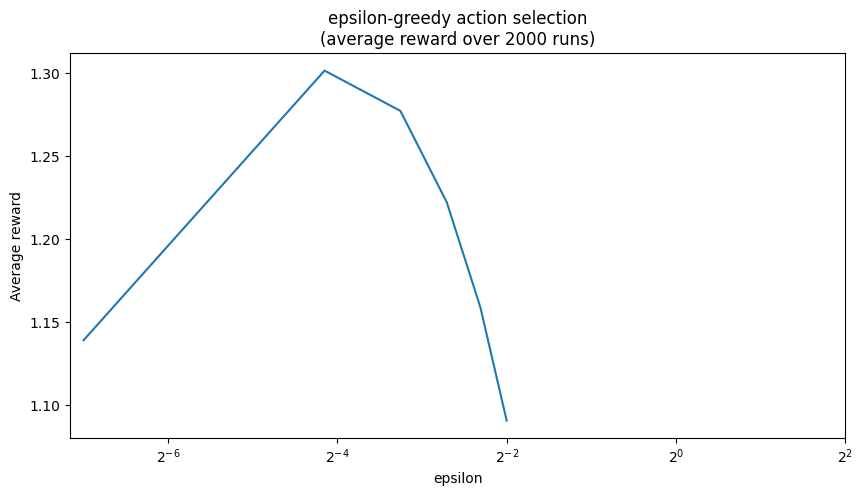

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
epsilons = np.linspace(1/128, 1/4, 6)
reward_list = []

for epsilon in epsilons:
    Q = np.zeros((2000, 10))
    N = np.zeros((2000, 10))
    histories = []
    for j in range(2000):
        history = []
        for i in range(1000):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(q[j]))
        histories.append(history)
    reward_list.append(np.mean(np.mean(histories, axis=0)))

plt.figure(figsize=(10, 5))
plt.plot(epsilons, reward_list)
plt.title('epsilon-greedy action selection\n(average reward over 2000 runs)')
plt.xlabel('epsilon')
plt.ylabel('Average reward')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)
plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_22296\3794247872.py:41: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.007, 4, 0.5)


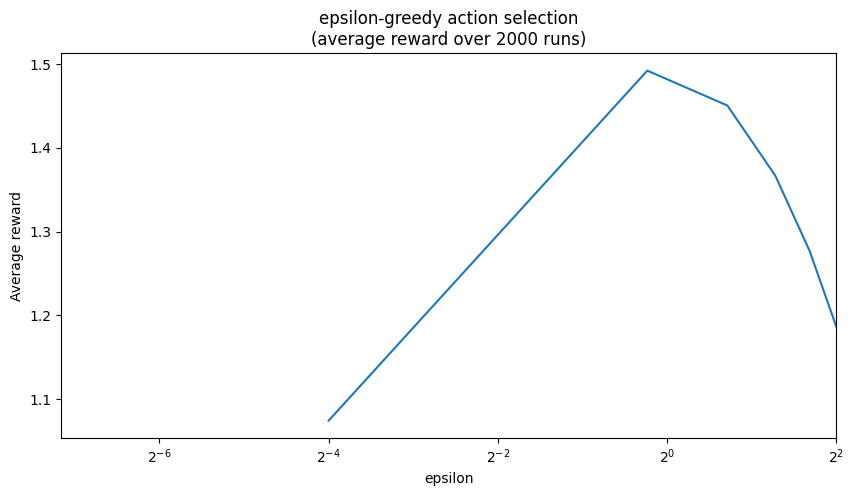

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
set_of_c = np.linspace(1/16, 4, 6)
reward_list = []

for c in set_of_c:
    Q = np.zeros((2000, 10))
    N = np.ones((2000, 10))
    histories = []
    for j in range(2000):
        history = []
        for i in range(1000):
            action = np.argmax([stima+c*np.sqrt(np.log(i+1)/N[j][idx]) for idx, stima in enumerate(Q[j])])
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    reward_list.append(np.mean(np.mean(histories, axis=0)))

plt.figure(figsize=(10, 5))
plt.plot(set_of_c, reward_list)
plt.title('Upper-Confidence-Bound Action Selection\n(average reward over 2000 runs)')
plt.xlabel('c')
plt.ylabel('Average reward')
plt.xscale('log', base=2)
plt.xlim(0.007, 4, 0.5)
plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_22296\1750249513.py:44: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)


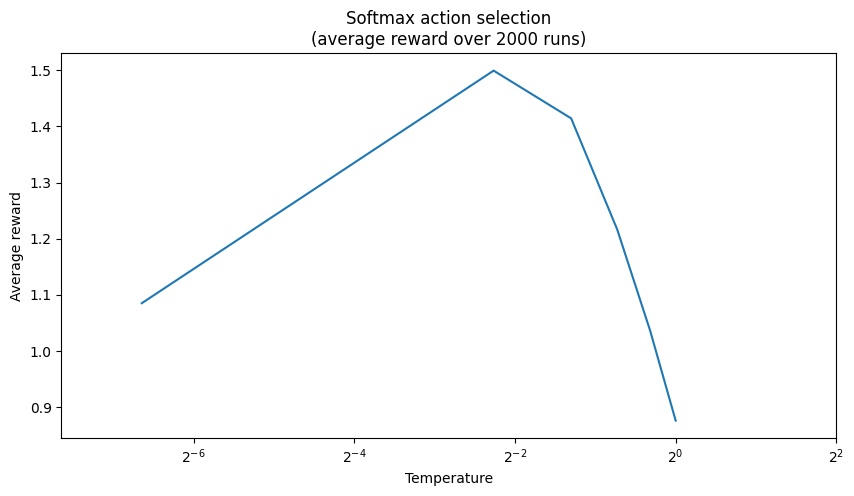

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def softmax(x, T):
    return np.exp(x/T) / np.sum(np.exp(x/T), axis=0)

def next_action(Q, T=1):
    prob = softmax(Q, T)
    return np.random.choice(range(len(Q)), p=prob)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
temperatures = np.linspace(0.01, 1, 6)
reward_list = []
n_iter = 100

for T in temperatures:
    Q = np.zeros((n_iter, 10))
    N = np.zeros((n_iter, 10))
    histories = []
    for j in range(n_iter):
        history = []
        for i in range(1000):
            action = next_action(Q[j], T)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(q[j]))
        histories.append(history)
    reward_list.append(np.mean(np.mean(histories, axis=0)))

plt.figure(figsize=(10, 5))
plt.plot(temperatures, reward_list)
plt.title('Softmax action selection\n(average reward over 2000 runs)')
plt.xlabel('Temperature')
plt.ylabel('Average reward')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)
plt.show()


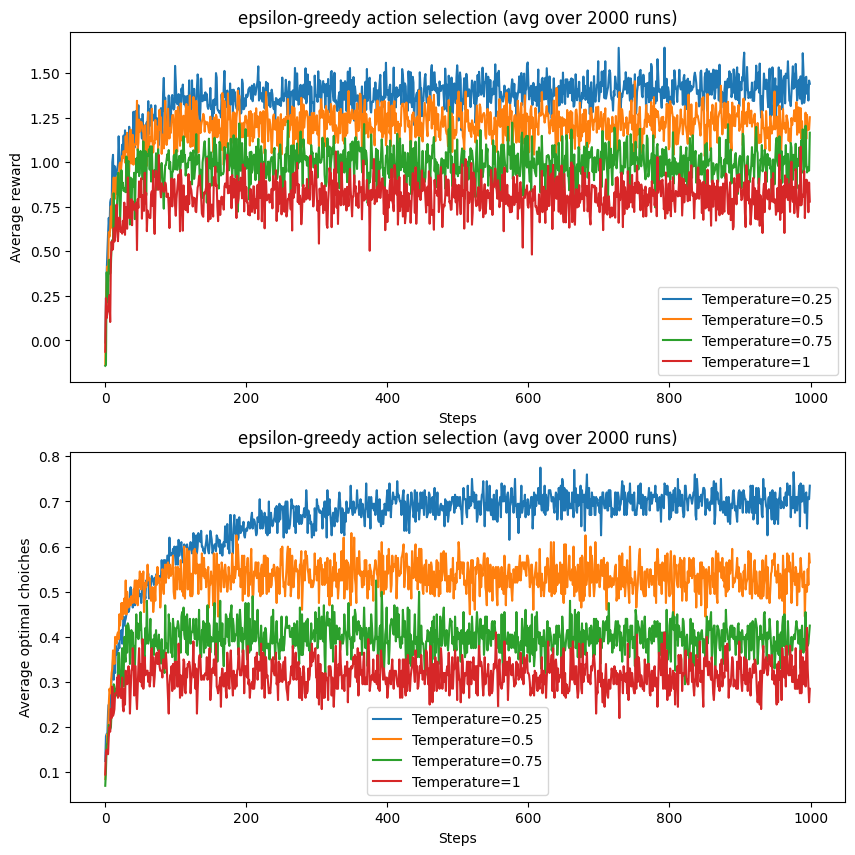

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def softmax(x, T):
    return np.exp(x/T) / np.sum(np.exp(x/T), axis=0)

def next_action(Q, T=1):
    prob = softmax(Q, T)
    return np.random.choice(range(len(Q)), p=prob)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)
n_iter = 200    # 2000 suggested

for T in [0.25, 0.5, 0.75, 1]:
    Q = np.zeros((n_iter, 10))
    N = np.zeros((n_iter, 10))
    histories = []
    optimal_choiches = []
    for j in range(n_iter):
        history = []
        optimal_choice = []
        for i in range(1000):
            action = next_action(Q[j], T)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(q[j]))
        histories.append(history)
        optimal_choiches.append(optimal_choice)
    avg_history = np.mean(histories, axis=0)
    avg_optimal_choiches = np.mean(optimal_choiches, axis=0)
    ax1.plot(avg_history, label='Temperature={}'.format(T))
    ax2.plot(avg_optimal_choiches, label='Temperature={}'.format(T))


ax1.set_title('Softmax action selection (avg over 2000 runs)')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Average reward')
ax1.legend()

ax2.set_title('Softmax action selection (avg over 2000 runs)')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Average optimal choiches')
ax2.legend()
plt.show()
